In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Collection

In [2]:
train_data = pd.read_excel(r"C:\Users\HP\Desktop\projects\predict fare of airline tickets\Data_Train.xlsx")

In [3]:
train_data.head(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218


In [4]:
train_data.tail(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


# Data Preproccessing / Data Cleaning

## Checking for Null values

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
train_data[train_data["Route"].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [8]:
train_data.dropna(inplace=True) #drop data with NA value

In [9]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

### Getting Exact memory size

In [10]:
train_data.info(memory_usage = "deep")

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 7.2 MB


## Convert data as recognizable by ML

In [11]:
data = train_data.copy()

In [12]:
data.head(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218


In [13]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [14]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [15]:
data[["Date_of_Journey","Dep_Time", "Arrival_Time"]].dtypes

Date_of_Journey    object
Dep_Time           object
Arrival_Time       object
dtype: object

### Convet Object Data type into Date_time

here all the datas are in a type of object including "Date_of_Journey","Dep_Time", "Arrival_Time". So even they are not ovject type they will be considered as object type. So they have to be changed to date_time type.

In [16]:
def change_to_datetype(dat, column):
    dat[column] = pd.to_datetime(dat[column])

In [17]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [18]:
for feature in ["Date_of_Journey","Dep_Time", "Arrival_Time"]:
    change_to_datetype(data, feature)

In [19]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

### Splitting the "Date_of_Journey" feature into day, month, year

In [20]:
data["Day_of_Journey"] = data["Date_of_Journey"].dt.day

In [21]:
data["Month_of_Journey"] = data["Date_of_Journey"].dt.month

In [22]:
data["Year_of_Journey"] = data["Date_of_Journey"].dt.year

In [23]:
data.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-07-21 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-07-21 05:50:00,2023-07-21 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2023-07-21 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2023-07-21 18:05:00,2023-07-21 23:30:00,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2023-07-21 16:50:00,2023-07-21 21:35:00,4h 45m,1 stop,No info,13302,1,3,2019


### splitting into hour and minute

In [24]:
def to_hour_min (dat, col):
    dat[col+"_hour"] = dat[col].dt.hour
    dat[col+"_minute"] = dat[col].dt.minute

In [25]:
for feature in ['Dep_Time', 'Arrival_Time']:
    to_hour_min(data, feature)

In [26]:
data.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-07-21 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-07-21 05:50:00,2023-07-21 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2023-07-21 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2023-07-21 18:05:00,2023-07-21 23:30:00,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2023-07-21 16:50:00,2023-07-21 21:35:00,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35


### Removing unwanted features

In [27]:
col_to_drop = ['Date_of_Journey','Dep_Time', 'Arrival_Time']
data.drop(col_to_drop, axis = 1, inplace=True)

In [28]:
data.head(5)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35


In [29]:
data.shape #dimension of the data

(10682, 15)

### Customize the Dep_Time and Arrival_time as morning or evening or etc

In [30]:
def to_session(x):
    if x >= 0 and x < 4:
        return "mid night"
    elif x >= 4 and x < 8:
        return "early morning"
    elif x >= 8 and x < 12:
        return "morning"
    elif x >= 12 and x < 16:
        return "afternoon"
    elif x >= 16 and x < 18:
        return "evening"
    else:
        return "night"

In [31]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Day_of_Journey', 'Month_of_Journey',
       'Year_of_Journey', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute'],
      dtype='object')

In [32]:
for feature in ['Dep_Time_hour','Arrival_Time_hour']:
    data[feature+ "_session"] = data[feature].apply(to_session)

In [33]:
data.head(6)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour_session,Arrival_Time_hour_session
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,night,mid night
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,early morning,afternoon
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25,morning,early morning
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30,night,night
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35,evening,night
5,SpiceJet,Kolkata,Banglore,CCU → BLR,2h 25m,non-stop,No info,3873,24,6,2019,9,0,11,25,morning,morning


### plotting the cutemoized details

In [34]:
data["Dep_Time_hour_session"].value_counts()

Dep_Time_hour_session
morning          2728
night            2702
early morning    2353
afternoon        1437
evening          1167
mid night         295
Name: count, dtype: int64

<Axes: xlabel='Dep_Time_hour_session'>

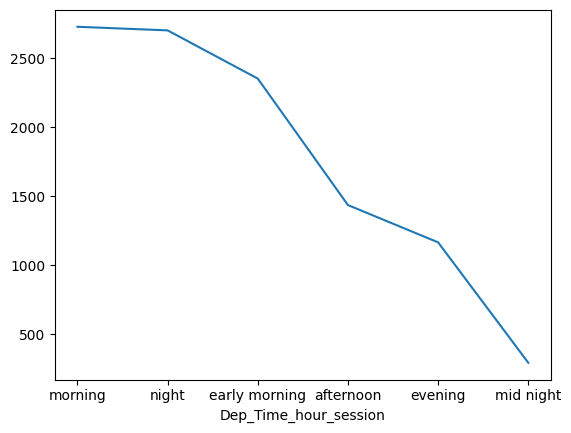

In [35]:
data["Dep_Time_hour_session"].value_counts().plot()

<Axes: xlabel='Dep_Time_hour_session'>

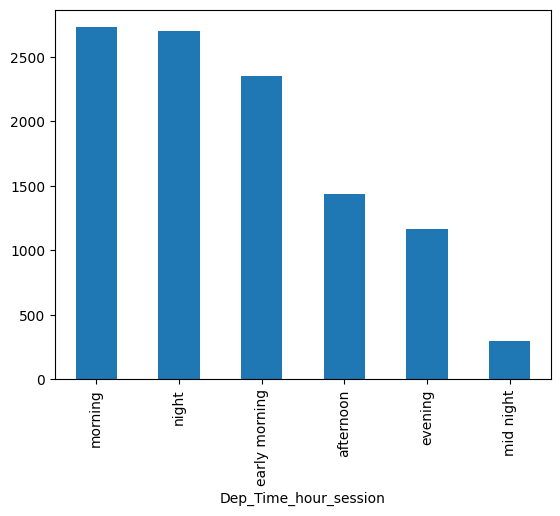

In [36]:
data["Dep_Time_hour_session"].value_counts().plot(kind = "bar")

In [37]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import plot, iplot, init_notebook_mode, download_plotlyjs
init_notebook_mode(connected=True)
cf.go_offline()

In [38]:
data["Dep_Time_hour_session"].value_counts().iplot(kind = "bar")

In [39]:
data.head(4)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour_session,Arrival_Time_hour_session
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,night,mid night
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,early morning,afternoon
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25,morning,early morning
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30,night,night


### Preprocessing for "Duration" feature

data has a feature called "Duration" whiich defines the duration of traval. This column data sometimes have only "m" with no "h" of only "h" with no "m" or both "h" and "m". Therefore the data should be preprocessed berofe anything else.

In [40]:
def to_hour_and_min(x):
    if "h" not in x:
        x = "0h " + x
    if "m" not in x:
        x = x + " 0m"
    return x

data["Duration"] = data["Duration"].apply(to_hour_and_min)

### splitting Duration feature - method 1

In [41]:
#data["Duration_hour"] = pd.to_timedelta(data["Duration"]).dt.components.hours
#data["Duration_minute"] = pd.to_timedelta(data["Duration"]).dt.components.minutes
#data["Duration_in_minute"] = data["Duration_hour"]*60 + data["Duration_minute"]
#data.head(6)

### splitting Duration feature - method 2

In [42]:
data["Duration_hour"] = data["Duration"].apply(lambda x: x.split(" ")[0][:-1])
data["Duration_minute"] = data["Duration"].apply(lambda x: x.split(" ")[1][:-1])
data["Duration_in_minute"] = data["Duration"].str.replace('h', '*60').str.replace(' ', '+').str.replace('m','*1').apply(eval)

In [43]:
data.head(6)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour_session,Arrival_Time_hour_session,Duration_hour,Duration_minute,Duration_in_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,night,mid night,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,early morning,afternoon,7,25,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,2019,9,25,4,25,morning,early morning,19,0,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30,night,night,5,25,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35,evening,night,4,45,285
5,SpiceJet,Kolkata,Banglore,CCU → BLR,2h 25m,non-stop,No info,3873,24,6,2019,9,0,11,25,morning,morning,2,25,145


## Data Analysis

### Is "Duration" impact on price or not

here we can use scatterplot or regressioon plot to know the impact

<Axes: xlabel='Duration_in_minute', ylabel='Price'>

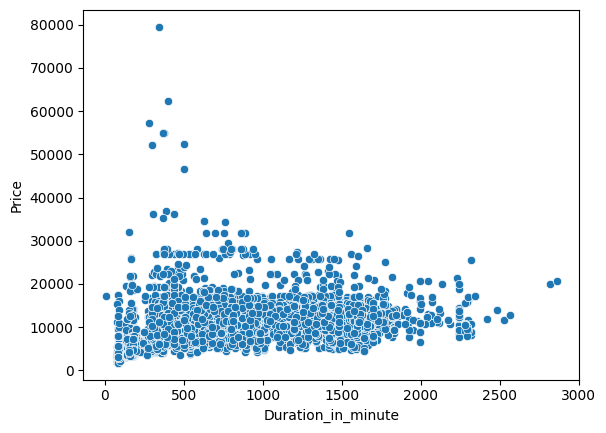

In [44]:
sns.scatterplot(x = "Duration_in_minute", y = "Price", data = data)

#### Use of hue parameter

<Axes: xlabel='Duration_in_minute', ylabel='Price'>

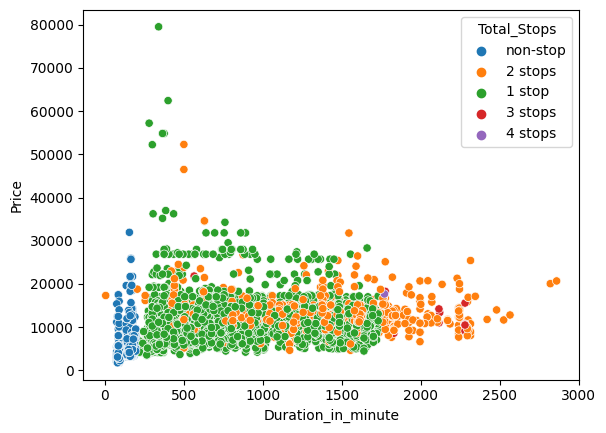

In [45]:
sns.scatterplot(x = "Duration_in_minute", y = "Price", hue = "Total_Stops", data= data)

In [46]:
data["Route"].value_counts()

Route
DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: count, Length: 128, dtype: int64

In [47]:
data[data["Airline"] == "Jet Airways"]["Route"].value_counts()

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
BOM → DED → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
Name: count, dtype: int64

### Analyse Airline vs Price

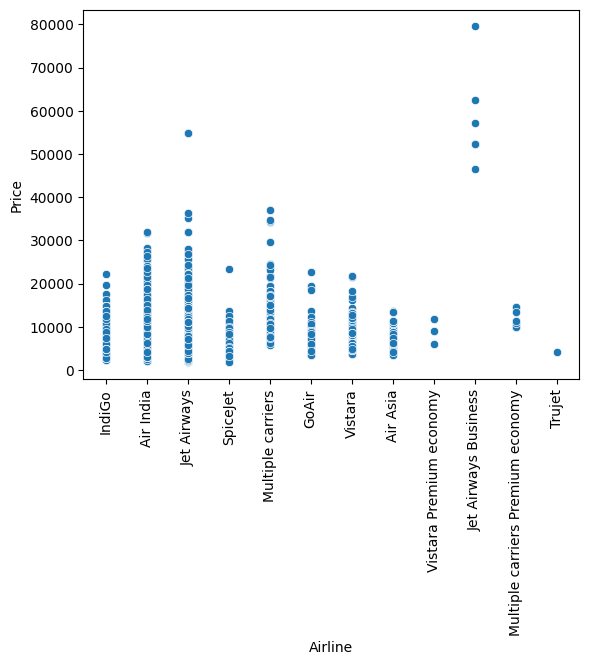

In [48]:
sns.scatterplot(x = 'Airline', y = 'Price',data = data)
plt.xticks(rotation = 'vertical')
plt.show()

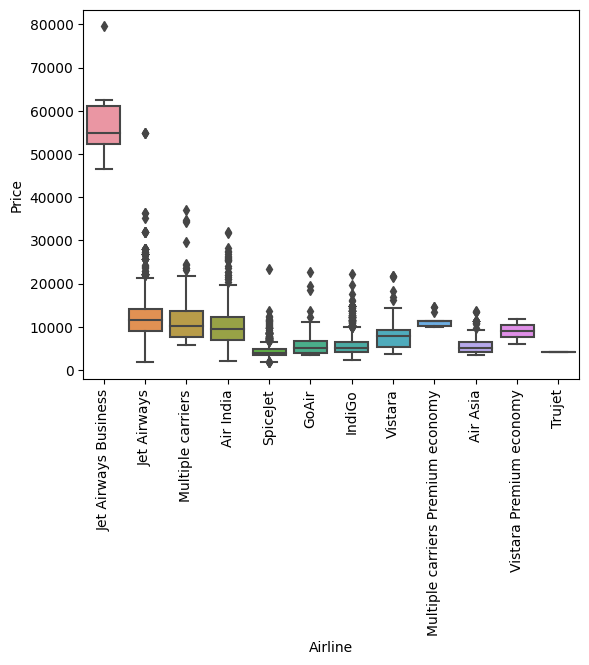

In [49]:
sns.boxplot(x = "Airline", y = "Price", data = data.sort_values('Price',ascending = False))
plt.xticks(rotation = 'vertical')
plt.show()

# Featue Engineering

### Feature Encoding 

Here, if the data is a Nominal data (The data which have the values cannot be determined in a order or with some comparation) then the encoding can be done by one-hot encoding. If the data is a Ordinal data (The data which have the values can be determined in a order or with some comparation, labeled) then the encoding can be done by label encoding.

In [50]:
data.head(5)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour_session,Arrival_Time_hour_session,Duration_hour,Duration_minute,Duration_in_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,night,mid night,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,early morning,afternoon,7,25,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,2019,9,25,4,25,morning,early morning,19,0,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30,night,night,5,25,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35,evening,night,4,45,285


#### One-hot Encoding

In this case "Source" and "Destination" are Nominal Data So, we can use one-hot encoding

In [51]:
data["Source"].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [52]:
def onehot(dat, col):
    for place in dat[col].unique():
        data[col+"_"+place] = dat[col].apply(lambda x: 1 if x == place else 0)

In [53]:
onehot(data,"Source")

In [54]:
data.head(5)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,...,Dep_Time_hour_session,Arrival_Time_hour_session,Duration_hour,Duration_minute,Duration_in_minute,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,...,night,mid night,2,50,170,1,0,0,0,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,...,early morning,afternoon,7,25,445,0,1,0,0,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,...,morning,early morning,19,0,1140,0,0,1,0,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,...,night,night,5,25,325,0,1,0,0,0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,...,evening,night,4,45,285,1,0,0,0,0


#### Target guided Encoding

This encoding is used when there is more object chatagaries and cannot be performed with one-hot encoding as it will create more unneccessary features

In [55]:
data.groupby("Airline")["Price"].mean().sort_values()

Airline
Trujet                                4140.000000
SpiceJet                              4338.284841
Air Asia                              5590.260188
IndiGo                                5673.682903
GoAir                                 5861.056701
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Air India                             9612.427756
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Name: Price, dtype: float64

In [56]:
data.groupby("Airline")["Price"].mean().sort_values().index

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [57]:
def tge(dat, col, target):
    sorted_ = dat.groupby(col)[target].mean().sort_values().index
    sorted_dict = {key:index for index, key in enumerate(sorted_ ,0)}
    dat[col] = dat[col].map(sorted_dict)

In [58]:
tge(data , "Airline", "Price")

In [59]:
data.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,...,Dep_Time_hour_session,Arrival_Time_hour_session,Duration_hour,Duration_minute,Duration_in_minute,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,...,night,mid night,2,50,170,1,0,0,0,0
1,7,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,...,early morning,afternoon,7,25,445,0,1,0,0,0
2,10,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,...,morning,early morning,19,0,1140,0,0,1,0,0


In [60]:
tge(data, 'Destination', 'Price')

In [61]:
data.head(5)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,...,Dep_Time_hour_session,Arrival_Time_hour_session,Duration_hour,Duration_minute,Duration_in_minute,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,5,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,...,night,mid night,2,50,170,1,0,0,0,0
1,7,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,...,early morning,afternoon,7,25,445,0,1,0,0,0
2,10,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,...,morning,early morning,19,0,1140,0,0,1,0,0
3,3,Kolkata,3,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,...,night,night,5,25,325,0,1,0,0,0
4,3,Banglore,5,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,...,evening,night,4,45,285,1,0,0,0,0


#### Label Encoding/ manual Encoding

If the dat is ordinal then this is the encoding method used. In this case for the feature "Total_Stops"

In [62]:
data["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [63]:
Total_Stop_dict = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [64]:
data["Total_Stops"] = data["Total_Stops"].map(Total_Stop_dict)

In [65]:
data.head(5)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,...,Dep_Time_hour_session,Arrival_Time_hour_session,Duration_hour,Duration_minute,Duration_in_minute,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,5,BLR → DEL,2h 50m,0,No info,3897,24,3,...,night,mid night,2,50,170,1,0,0,0,0
1,7,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,5,...,early morning,afternoon,7,25,445,0,1,0,0,0
2,10,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2,No info,13882,9,6,...,morning,early morning,19,0,1140,0,0,1,0,0
3,3,Kolkata,3,CCU → NAG → BLR,5h 25m,1,No info,6218,12,5,...,night,night,5,25,325,0,1,0,0,0
4,3,Banglore,5,BLR → NAG → DEL,4h 45m,1,No info,13302,1,3,...,evening,night,4,45,285,1,0,0,0,0


### Removing unnnecessary features

In [66]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Day_of_Journey', 'Month_of_Journey',
       'Year_of_Journey', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Dep_Time_hour_session',
       'Arrival_Time_hour_session', 'Duration_hour', 'Duration_minute',
       'Duration_in_minute', 'Source_Banglore', 'Source_Kolkata',
       'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [67]:
data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,...,Dep_Time_hour_session,Arrival_Time_hour_session,Duration_hour,Duration_minute,Duration_in_minute,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,5,BLR → DEL,2h 50m,0,No info,3897,24,3,...,night,mid night,2,50,170,1,0,0,0,0
1,7,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,5,...,early morning,afternoon,7,25,445,0,1,0,0,0


In [68]:
column_drop = ["Source", "Route", "Duration", 'Dep_Time_hour_session','Arrival_Time_hour_session']

In [69]:
data.drop(column_drop, axis = 1, inplace=True)

In [70]:
data["Additional_Info"].value_counts() 

Additional_Info
No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

hense, most of the values without information the "Additional_Info" can be ignored

In [71]:
data["Year_of_Journey"].value_counts()

Year_of_Journey
2019    10682
Name: count, dtype: int64

hence, the feature remain constant "Year_of_Journey" also can be igored

In [72]:
data.drop(["Additional_Info", "Year_of_Journey"], axis = 1, inplace= True)

In [73]:
data.head(4)

,Airline,Destination,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute,Duration_in_minute,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,5,0,3897,24,3,22,20,1,10,2,50,170,1,0,0,0,0
1,7,3,2,7662,1,5,5,50,13,15,7,25,445,0,1,0,0,0
2,10,4,2,13882,9,6,9,25,4,25,19,0,1140,0,0,1,0,0
3,3,3,1,6218,12,5,18,5,23,30,5,25,325,0,1,0,0,0


### Removing Outliers

In [74]:
def outlierplot(dat, col):
    fig , axes = plt.subplots(nrows=3, ncols=1)
    sns.histplot(dat["Price"],ax = axes[0], kde = False)
    sns.distplot(dat["Price"], ax = axes[1])
    sns.boxplot(x = dat["Price"], ax = axes[2] )

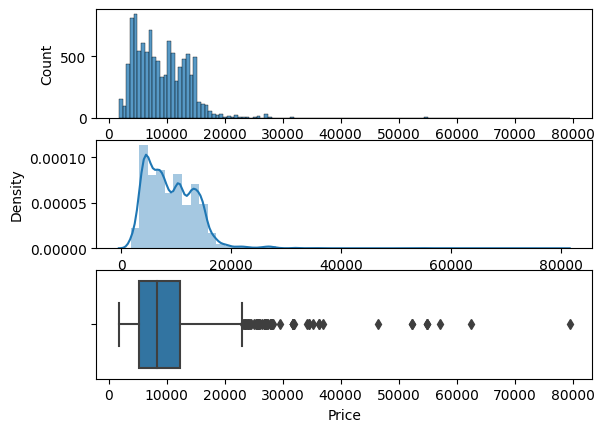

In [75]:
outlierplot(data, "Price")

In [76]:
def rmvout(dat, col):
    Q1 = np.percentile(dat[col], 25)
    Q3 = np.percentile(dat[col], 75)
    iqr = Q3-Q1
    maximum = Q3 + 1.5*iqr
    minimum = Q1 - 1.5*iqr
    dat[col] = np.where(dat[col] > maximum , dat[col].median(), dat[col] )
    dat[col] = np.where(dat[col] < minimum , dat[col].median(), dat[col] )

In [77]:
rmvout(data, "Price")

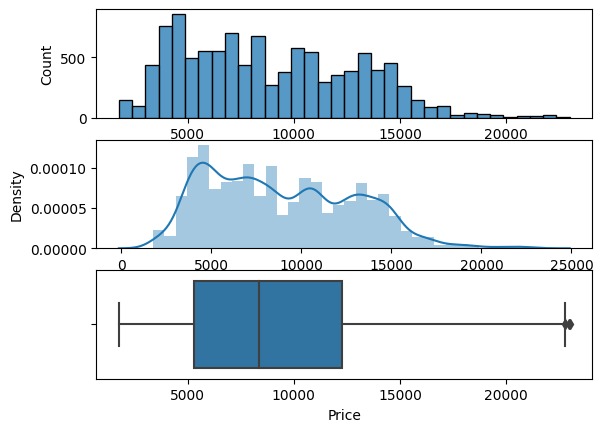

In [78]:
outlierplot(data, "Price")

### Feature selection

#### Mutual information Algorithm

In [79]:
from sklearn.feature_selection import mutual_info_regression

In [80]:
X = data.drop("Price", axis = 1)

In [81]:
y = data["Price"]

In [82]:
mi = mutual_info_regression(X, y)

In [83]:
mi_data = pd.DataFrame(data = mi, index=X.columns, columns=["mutual_info"])

In [84]:
mi_data.sort_values(by='mutual_info', ascending=False)

,mutual_info
Duration_in_minute,1.782608
Airline,1.311646
Destination,1.164688
Arrival_Time_hour,1.137386
Duration_hour,1.114588
Dep_Time_hour,0.921240
Arrival_Time_minute,0.885613
Total_Stops,0.793461
Dep_Time_minute,0.763766
Duration_minute,0.680338


## Model building

### Random Forest

Random forest is an algorithm used for claasification and regression. It is a collection of multiple dicision Trees. So, The base idea of this algorithm is Decission Tree. These Dicision Trees are built with a technique called "Bagging" or "Bootstrap Aggrigation". This will convert high variance into low variance (increse accuracy)

What is bagging
* bagging will get prediction results from the multiple Dicision Trees and give the the final prediction. 
1. mean of all the predictions for regression.
2. majority of all predictions for classifications

#### Decission Tree

In Decission Tree the major kind of issue we all face is what feature should be selected as a Parent Node. For this there are two methods mainly used

1. Entropy and Information Gain (feature with higher entropy will be selected as parent node)
* Randomness of the data / probablity of occurance of a prediction
* Impurity is oppsite (E = -Pi * log2(Pi)) of the probablity of data (Eg : when P = 1, Impurity = 0)
2. Gini Index/ Impurity (feature with lower Gini Index will be selected as parent node)

In decission tree there is no need to do scaling and Normalization. But takes more time to train a modal

##### Decission tree Algorithms

1. ID3 Algorithm 
* Mainly for classification problems -chatagarical
* Uses Information gain critarian

2. C 4.5
* Mainly for continuous and descrite type data (for both NUmarical and chategorical)
* Much better than ID3
* Uses Gini index critarian

3. CART (Classification And Reggeression Trees)
* Can be used for both classification and regression use casses
* Highly used Algorithm in Industry
* Uses Gini index critarian

4. C 5.0
* Better than C 4.5
* Mainly for Chategorical data (yes, No target)

5. MARS
* Creates series of peerwise linear model

6. Decission stup
* for single branch tree

7. M5
* When there is much outliers/ noise in data
* When the data is really small

##### Pre punning / Post pruning

These algoriths are used when there is overfiting issue (Train accuracy >>> test accuracy) in our data. It controls the depth of the tree.
1. Post pruning - After building decision tree
* It removes useless branches (Rand CV, Grid search CV, Optuno Algorithm)

2. Pre pruning - before building decision tree
* controls height of decision tree

#### KNN

never use KNN for huge dataset beacause it takes lots of time

to find k there are some approches
* Cross validation
* Randimized search CV
* Grid search

to find distance
* Euqlidian Distance
* Manhatten Distance
* Hamming Distance

KNN is called as "Lazy-learner algorithm" as it doesn't do anything with trainning databut only when there is a testing data which means it will not build a model. instead it takes whole data as a model

In [85]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [86]:
from sklearn.ensemble import RandomForestRegressor
rand = RandomForestRegressor()
rand.fit(X_train, y_train)
y_pred = rand.predict(X_test)

In [87]:
from sklearn import metrics
metrics.r2_score(y_test, y_pred)

0.8017830080088522

In [88]:
import pickle
file = open("rf.pkl", "wb")
pickle.dump(rand, file)

In [89]:
mod = open("rf.pkl", "rb")
forest = pickle.load(mod)
y_pred1 = forest.predict(X_test)
metrics.r2_score(y_test, y_pred1)

0.8017830080088522

### Automate machine learning pipeline

In [90]:
def predict(ml_model):
    model = ml_model.fit(X_train, y_train)
    print("training score : {}".format(model.score(X_train, y_train)))
    y_pred = model.predict(X_test)
    print("r2_score : {}".format(metrics.r2_score(y_test, y_pred)))
    print("MSE : {}".format(metrics.mean_squared_error(y_test, y_pred)))
    print("MAE : {}".format(metrics.mean_absolute_error(y_test, y_pred)))
    print("MAPE : {}".format(metrics.mean_absolute_percentage_error(y_test, y_pred)))
    print("RMSE : {}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
    sns.distplot(y_pred - y_test)

In [91]:
import sklearn

training score : 0.9481096651415997
r2_score : 0.802095450103761
MSE : 3254546.4221864743
MAE : 1154.1945618194425
MAPE : 0.13128773196434726
RMSE : 1804.036147693963


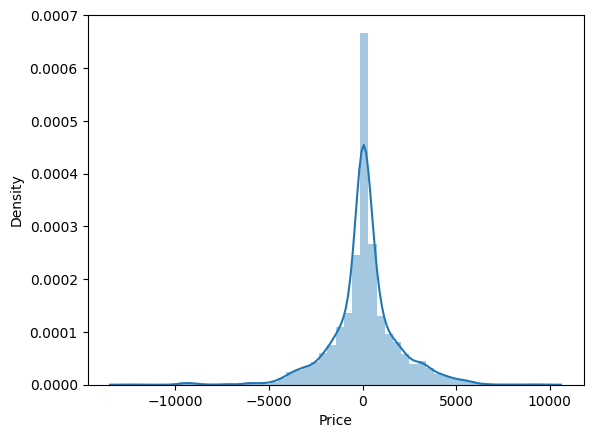

In [92]:
predict(RandomForestRegressor())

In [93]:
from sklearn.tree import DecisionTreeRegressor

training score : 0.9643446329605819
r2_score : 0.6723123082963312
MSE : 5388834.188945484
MAE : 1369.6193499739989
MAPE : 0.15478619823535583
RMSE : 2321.3862644862625


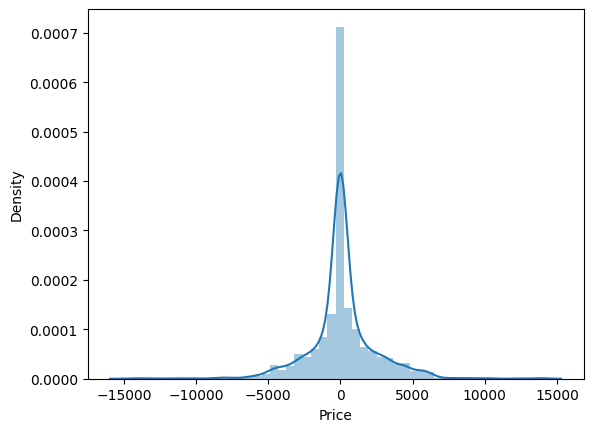

In [94]:
predict(DecisionTreeRegressor())

In [95]:
from sklearn.neighbors import KNeighborsRegressor

training score : 0.7664978641269021
r2_score : 0.6347372376415228
MSE : 6006757.383875195
MAE : 1665.8601560062405
MAPE : 0.19157214872064524
RMSE : 2450.8686998440357


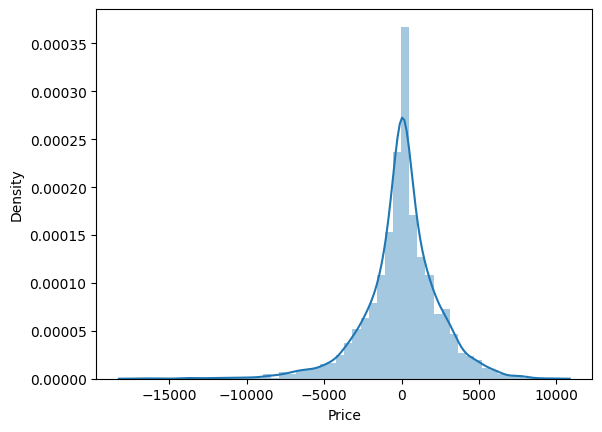

In [96]:
predict(KNeighborsRegressor())

### Cross validation

Algorithms used

* Kfold
* GridSearch - Returns best parameter values
* RandamizedCV - Returns best parameter values
* Genetic

### Hypertune machine learning

In [97]:
n_estimators= [x for x in range(0,200,1)]
max_depth=[x for x in range(0,20,1)]
min_samples_split=[x for x in range(0,30,1)]
max_features=[x for x in range(0,500,1)]

In [98]:
para_dist = {"n_estimators" : n_estimators, "max_depth" : max_depth, "min_samples_split" : min_samples_split, "max_features" : max_features}

In [99]:
from sklearn.model_selection import RandomizedSearchCV

In [100]:
RScv = RandomizedSearchCV(estimator=RandomForestRegressor(), param_distributions=para_dist, cv= 6, n_jobs=-1)

In [101]:
RScv.fit(X_train, y_train)

RandomizedSearchCV(cv=6, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8,
                                                      9, 10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19],
                                        'max_features': [0, 1, 2, 3, 4, 5, 6, 7,
                                                         8, 9, 10, 11, 12, 13,
                                                         14, 15, 16, 17, 18, 19,
                                                         20, 21, 22, 23, 24, 25,
                                                         26, 27, 28, 29, ...],
                                        'min_samples_split': [0, 1, 2, 3, 4, 5,
                                                              6, 7, 8, 9, 10,
                                                              11, 12, 13, 14,
                                                              15, 16, 17, 18,
                                                              19, 20, 21, 22,
                                                              23, 24, 25, 26,
                                                              27, 28, 29],
                                        'n_estimators': [0, 1, 2, 3, 4, 5, 6, 7,
                                                         8, 9, 10, 11, 12, 13,
                                                         14, 15, 16, 17, 18, 19,
                                                         20, 21, 22, 23, 24, 25,
                                                         26, 27, 28, 29, ...]})

In [102]:
RScv.best_estimator_

RandomForestRegressor(max_depth=15, max_features=467, min_samples_split=5,
                      n_estimators=160)

In [103]:
RScv.best_score_

0.8094676789003294